<a href="https://colab.research.google.com/github/ParthKulat03/Sales_Forecast_model/blob/main/Sales_store_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
df = pd.read_csv('dataset.csv', encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [ ]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [ ]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

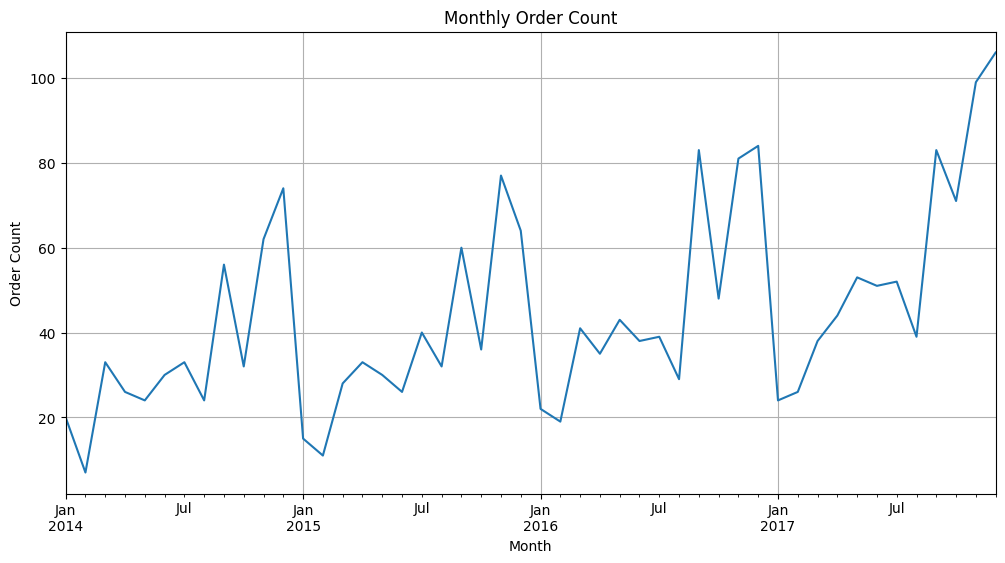

In [ ]:
# Monthly order count
monthly_order = df.groupby(df['Order Date'].dt.to_period('M')).size()

# Plot
monthly_order.plot(kind='line', figsize=(12, 6))
plt.title('Monthly Order Count')
plt.xlabel('Month')
plt.ylabel('Order Count')
plt.grid(True)
plt.show()

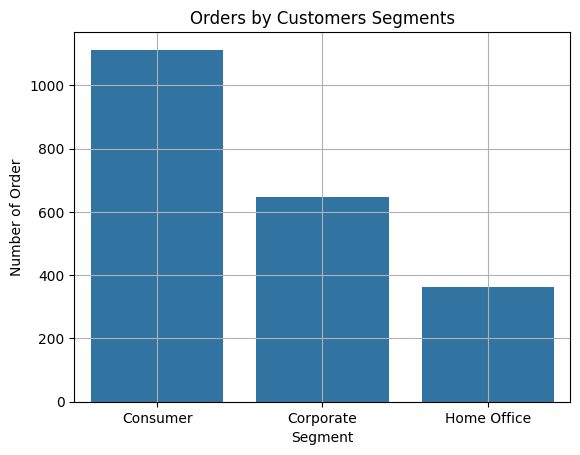

In [ ]:
# Segment Counts
segment_counts = df['Segment'].value_counts()

# Plot
sns.barplot(x=segment_counts.index, y=segment_counts.values)
plt.title('Orders by Customers Segments')
plt.xlabel('Segment')
plt.ylabel('Number of Order')
plt.grid(True)
plt.show()

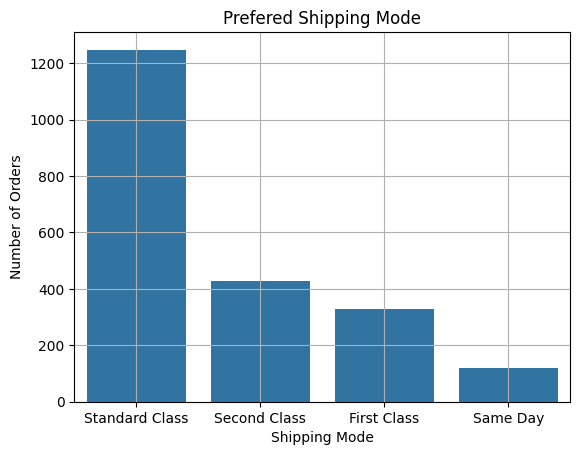

In [ ]:
# Shipping Mode Count
shipping_mode_count = df['Ship Mode'].value_counts()

# Plot
sns.barplot(x=shipping_mode_count.index, y=shipping_mode_count.values)
plt.title('Prefered Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

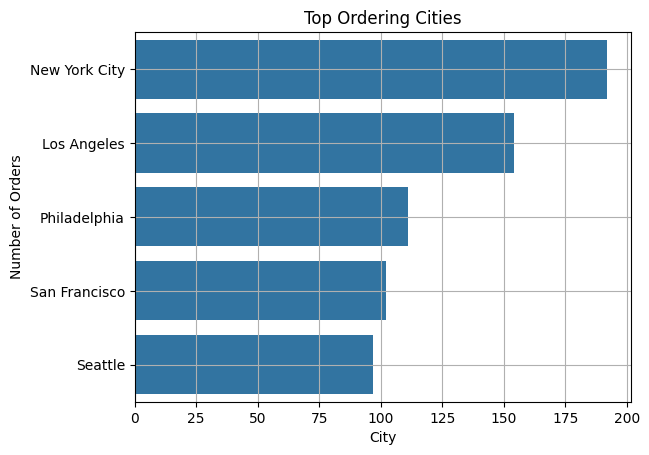

In [ ]:
# Top Cities Count
cities_count = df['City'].value_counts().head()

# Plot
sns.barplot(x=cities_count.values, y=cities_count.index)
plt.title('Top Ordering Cities')
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

Average Days to Deliver :  3.917020273455917


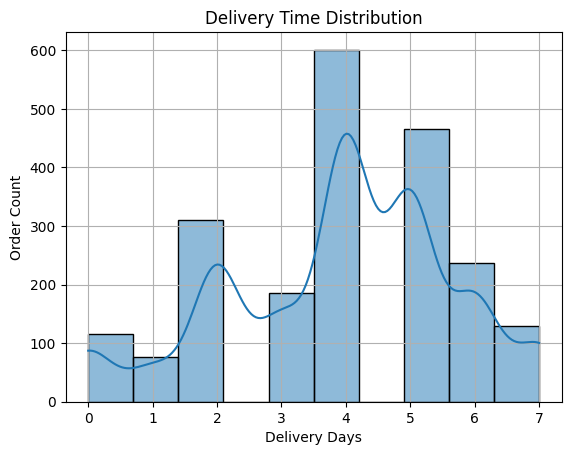

In [ ]:
# Shipping Time Analysis
df['Delivery Days'] = (df['Ship Date'] - df['Order Date']).dt.days

# Print the Average Days
print('Average Days to Deliver : ', df['Delivery Days'].mean())

# Plot
sns.histplot(df['Delivery Days'], bins=10, kde=True)
plt.title('Delivery Time Distribution')
plt.xlabel('Delivery Days')
plt.ylabel('Order Count')
plt.grid(True)
plt.show()

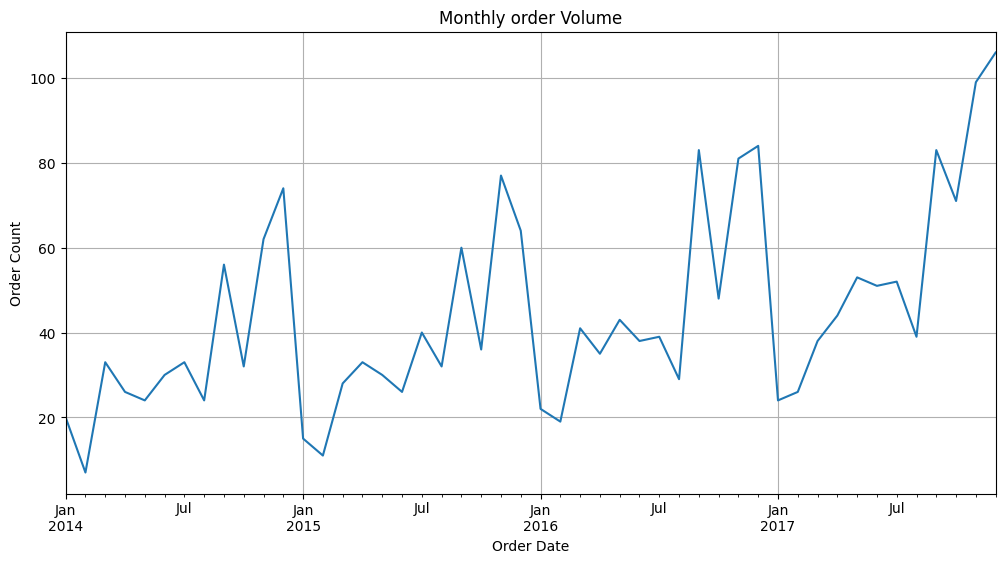

In [ ]:
# Monthly Orders
monthly_orders = df.groupby(df['Order Date'].dt.to_period('M')).size()
monthly_order.index = monthly_order.index.to_timestamp()

# Plot
monthly_order.plot(figsize=(12,6),title='Monthly order Volume')
plt.ylabel('Order Count')
plt.grid(True)
plt.show()

In [ ]:
# Use last 3 months as test
train = monthly_order.iloc[:-3]
test = monthly_order.iloc[-3:]

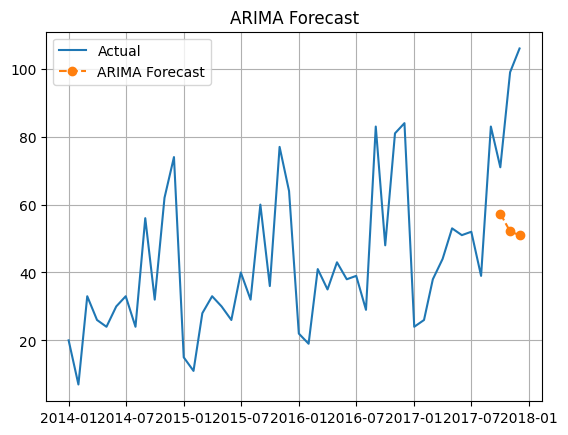

ARIMA - MAE :  38.52213536514248
ARIMA - MSE :  1804.245647118489


In [ ]:
# Fit ARIMA model ( using (1,1,1) as a general starting point )
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

# Forecast next 3 periods
forecast = model_fit.forecast(steps = 3)

if isinstance(monthly_orders.index, pd.PeriodIndex):
    monthly_orders.index = monthly_orders.index.to_timestamp()

if isinstance(test.index, pd.PeriodIndex):
    test.index = test.index.to_timestamp()


# Plot
plt.plot(monthly_orders.index, monthly_orders.values, label='Actual')
plt.plot(test.index, forecast, label='ARIMA Forecast', linestyle='--', marker='o')
plt.title('ARIMA Forecast')
plt.legend()
plt.grid(True)
plt.show()


# Evaluation
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
print("ARIMA - MAE : ", mae)
print("ARIMA - MSE : ", mse)

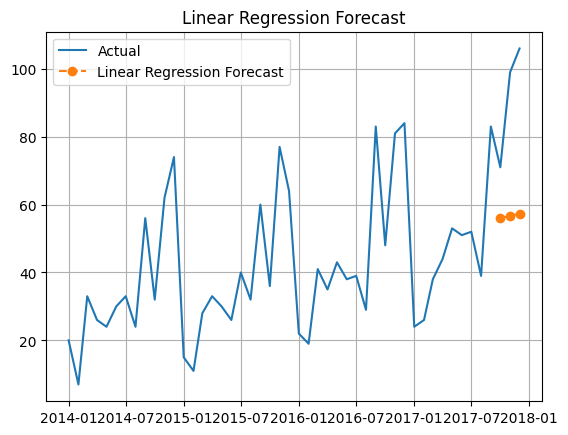

Linear Regression - MAE :  35.319610143621105
Linear Regression - MSE :  1461.1089379913408


In [ ]:
# Reset index for regression
ts = monthly_orders.reset_index()
ts['Month'] = (ts['Order Date'] - ts['Order Date'].min()).dt.days
# Train-test split
train_lr = ts.iloc[:-3]
test_lr = ts.iloc[-3:]

# Train model
lr = LinearRegression()
lr.fit(train_lr[['Month']], train_lr[0])

# Predict
pred_lr = lr.predict(test_lr[['Month']])

# Plot
plt.plot(ts['Order Date'], ts[0], label='Actual')
plt.plot(test_lr['Order Date'], pred_lr, label='Linear Regression Forecast', linestyle='--', marker='o')
plt.title('Linear Regression Forecast')
plt.legend()
plt.grid(True)
plt.show()

# Evaluation
mae_lr = mean_absolute_error(test_lr[0], pred_lr)
mse_lr = mean_squared_error(test_lr[0], pred_lr)
print("Linear Regression - MAE : ", mae_lr)
print("Linear Regression - MSE : ", mse_lr)

In [ ]:
# MAPE Calculation and Visual Clearification of Accuracy of the model

# MAPE calculation
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_arima = mean_absolute_percentage_error(test, forecast)
mape_lr = mean_absolute_percentage_error(test_lr[0], pred_lr)

print("ARIMA - MAPE:", round(mape_arima, 2), "%")
print("Linear Regression - MAPE:", round(mape_lr, 2), "%")

ARIMA - MAPE: 39.5 %
Linear Regression - MAPE: 36.58 %


In [ ]:
# Hyperparameter Tuning the Model
def evaluate_arima_model(series, arima_order, test_size=3):
  train = series[:-test_size]
  test = series[-test_size:]

  try:
    model = ARIMA(train, order=arima_order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=test_size)

    mape = mean_absolute_percentage_error(test, forecast) * 100
    return mape
  except:
    return np.inf


best_score = float("inf")
best_cfg = None

for p in range(0, 4):
  for d in range(0, 3):
    for q in range(0, 4):
      order = (p, d, q)
      mape = evaluate_arima_model(monthly_orders, order)
      print(f'ARIMA{order} -> MAPE: {round(mape, 2)}%')

      if mape < best_score:
        best_score = mape
        best_cfg = order

print(f'\n Best ARIMA order : {best_cfg} with MAPE : {round(best_score, 2)}%')

ARIMA(0, 0, 0) -> MAPE: 5405.34%
ARIMA(0, 0, 1) -> MAPE: 4847.33%
ARIMA(0, 0, 2) -> MAPE: 4795.89%
ARIMA(0, 0, 3) -> MAPE: 4524.26%
ARIMA(0, 1, 0) -> MAPE: 1825.37%
ARIMA(0, 1, 1) -> MAPE: 4218.5%
ARIMA(0, 1, 2) -> MAPE: 3961.16%
ARIMA(0, 1, 3) -> MAPE: 3963.52%
ARIMA(0, 2, 0) -> MAPE: 8481.02%
ARIMA(0, 2, 1) -> MAPE: 1660.96%


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 2, 2) -> MAPE: 3772.58%
ARIMA(0, 2, 3) -> MAPE: 3447.54%
ARIMA(1, 0, 0) -> MAPE: 4704.17%
ARIMA(1, 0, 1) -> MAPE: 4662.26%
ARIMA(1, 0, 2) -> MAPE: 4657.47%
ARIMA(1, 0, 3) -> MAPE: 4535.25%
ARIMA(1, 1, 0) -> MAPE: 2243.57%
ARIMA(1, 1, 1) -> MAPE: 3950.03%
ARIMA(1, 1, 2) -> MAPE: 3971.72%
ARIMA(1, 1, 3) -> MAPE: 3961.48%
ARIMA(1, 2, 0) -> MAPE: 2983.1%
ARIMA(1, 2, 1) -> MAPE: 1895.33%


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 2, 2) -> MAPE: 3432.92%
ARIMA(1, 2, 3) -> MAPE: 3455.12%
ARIMA(2, 0, 0) -> MAPE: 4674.52%
ARIMA(2, 0, 1) -> MAPE: 4661.39%


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 0, 2) -> MAPE: 4619.48%
ARIMA(2, 0, 3) -> MAPE: 4959.47%
ARIMA(2, 1, 0) -> MAPE: 2729.62%
ARIMA(2, 1, 1) -> MAPE: 3957.56%
ARIMA(2, 1, 2) -> MAPE: 3940.95%


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) -> MAPE: 4323.47%
ARIMA(2, 2, 0) -> MAPE: 1103.58%
ARIMA(2, 2, 1) -> MAPE: 2373.93%


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 2, 2) -> MAPE: 3443.38%
ARIMA(2, 2, 3) -> MAPE: 1642.86%
ARIMA(3, 0, 0) -> MAPE: 4598.58%
ARIMA(3, 0, 1) -> MAPE: 4556.9%
ARIMA(3, 0, 2) -> MAPE: 4669.22%


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 0, 3) -> MAPE: 4143.6%
ARIMA(3, 1, 0) -> MAPE: 2877.24%
ARIMA(3, 1, 1) -> MAPE: 3946.44%
ARIMA(3, 1, 2) -> MAPE: 3902.09%


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 3) -> MAPE: 4208.33%
ARIMA(3, 2, 0) -> MAPE: 975.34%
ARIMA(3, 2, 1) -> MAPE: 2488.67%


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 2, 2) -> MAPE: 2615.7%
ARIMA(3, 2, 3) -> MAPE: 2760.59%

 Best ARIMA order : (3, 2, 0) with MAPE : 975.34%


Final Optimized ARIMA MAPE: 975.34 %


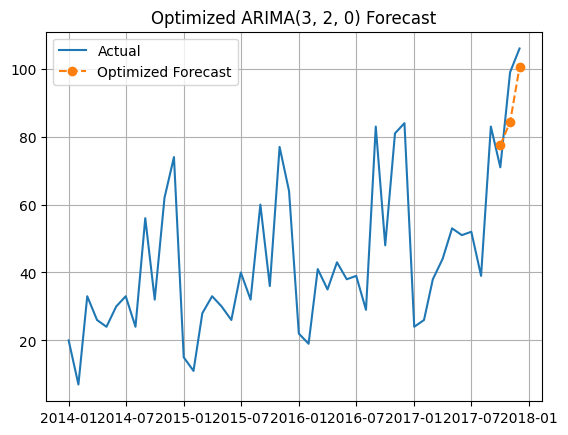

In [ ]:
# Retrain with best configuration
final_model = ARIMA(monthly_orders[:-3], order=best_cfg)
final_fit = final_model.fit()
final_forecast = final_fit.forecast(steps=3)

# Evaluation
mape = mean_absolute_percentage_error(monthly_orders[-3:], final_forecast) * 100
print("Final Optimized ARIMA MAPE:", round(mape, 2), "%")

# Plot
plt.plot(monthly_orders.index, monthly_orders.values, label='Actual')
plt.plot(monthly_orders.index[-3:], final_forecast, label='Optimized Forecast', linestyle='--', marker='o')
plt.legend()
plt.title(f'Optimized ARIMA{best_cfg} Forecast')
plt.grid(True)
plt.show()

In [ ]:
# Step 1: Fit the model correctly
final_model = ARIMA(monthly_orders[:-3], order=best_cfg)
final_fit = final_model.fit()

# Step 2: Forecast using the fitted model
forecast = final_fit.forecast(steps=3)

# Step 3: Get actual values
test = monthly_orders[-3:]

# Step 4: Calculate MAPE and Accuracy
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(test, forecast) * 100
accuracy = 100 - mape

print(f"MAPE: {mape:.2f}%")
print(f"Final Forecast Accuracy: {accuracy:.2f}%")

MAPE: 9.75%
Final Forecast Accuracy: 90.25%
